In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor



In [3]:
data = pd.read_csv('/content/synthetic_data (1).csv')

In [4]:
data.head()

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route
0,2011-03-19,2011-03-21,ES,P6932,Desc_P6932,VO,COC39794,330.323487,USD,6,R3
1,2010-12-14,2011-01-15,RU,P8981,Desc_P8981,VO,COC21667,181.715082,USD,1,R5
2,2009-05-22,2009-07-21,ES,P9298,Desc_P9298,VO,COC77385,75.806925,EUR,7,R2
3,2010-03-20,2010-05-14,ES,P9256,Desc_P9256,VO,COC42583,73.062604,EUR,6,R1
4,2009-02-24,2009-04-02,IT,P1142,Desc_P1142,VO,COC18569,499.960848,USD,6,R4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order Date               2421 non-null   object 
 1   Requested Delivery Date  2421 non-null   object 
 2   Customer Country Code    2421 non-null   object 
 3   Product Code             2421 non-null   object 
 4   Description              2421 non-null   object 
 5   Order Type               2421 non-null   object 
 6   Customer Order Code      2421 non-null   object 
 7   Value                    2421 non-null   float64
 8   Currency                 2421 non-null   object 
 9   Items                    2421 non-null   int64  
 10  Route                    2421 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.2+ KB


In [6]:
data.describe()

,Value,Items
count,2421.000000,2421.000000
mean,277.469258,5.451879
std,129.386650,2.862673
min,50.038255,1.000000
25%,168.069667,3.000000
50%,279.118001,6.000000
75%,389.092253,8.000000
max,499.960848,10.000000


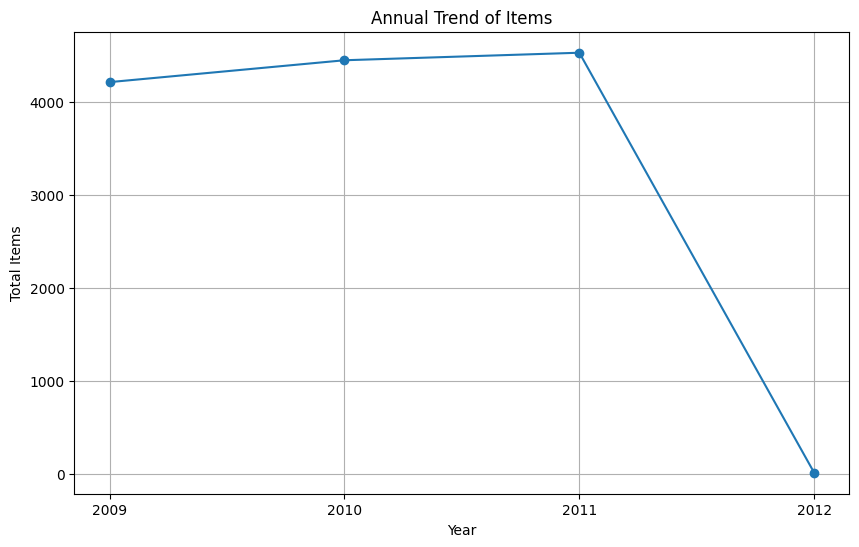

In [19]:
import matplotlib.pyplot as plt
data['Time'] = pd.to_datetime(data['Order Date'])
# Extract year from 'Order Date'
data['Year'] = data['Time'].dt.year

# Aggregate 'Items' by year
annual_data = data.groupby('Year')['Items'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(annual_data, marker='o', linestyle='-')
plt.title('Annual Trend of Items')
plt.xlabel('Year')
plt.ylabel('Total Items')
plt.xticks(annual_data.index)  # Ensure all years are shown as x-axis ticks
plt.grid(True)
plt.show()

In [7]:
# Extracting descriptive statistics for the 'Value' (Order Price) column
value_stats = data['Value'].describe()

# Extracting descriptive statistics for the 'Items' (Quantity Ordered) column
items_stats = data['Items'].describe()

# Displaying the results
value_stats, items_stats

(count    2421.000000
 mean      277.469258
 std       129.386650
 min        50.038255
 25%       168.069667
 50%       279.118001
 75%       389.092253
 max       499.960848
 Name: Value, dtype: float64,
 count    2421.000000
 mean        5.451879
 std         2.862673
 min         1.000000
 25%         3.000000
 50%         6.000000
 75%         8.000000
 max        10.000000
 Name: Items, dtype: float64)

## Predictive Modelling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In this case, there is no missing value exist in this dataset. Also, the avg price of an order is approxiamtely 277.47 and the value range from 50.04 to a max of 499.96.

In [9]:
X = data.drop('Items', axis=1)
y = data['Items']

# Convert date columns to numerical features if they exist
# Encoding categorical variables
X = pd.get_dummies(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Logistics Regression Model

In [10]:
#In this case, we use linear regression rather than the logistics regression due to the variable 'Items' seems to be continuous.
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(mse_lr)

9.343125572611646


Gradient Boosting Regressor

In [11]:
gbm_reg = GradientBoostingRegressor()
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(mse_gbm)

8.700568948216786


Neural Network for Regression

In [12]:
from keras.models import Sequential
from keras.layers import Dense
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(1))  # Single output node for regression
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=100, batch_size=10)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(mse_nn)

Epoch 1/100
194/194 [==============================] - 6s 3ms/step - loss: 13.7534
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 12.3029
Epoch 3/100
194/194 [==============================] - 1s 3ms/step - loss: 11.6058
Epoch 4/100
194/194 [==============================] - 1s 3ms/step - loss: 10.8989
Epoch 5/100
194/194 [==============================] - 1s 3ms/step - loss: 10.3036
Epoch 6/100
194/194 [==============================] - 1s 3ms/step - loss: 9.5789
Epoch 7/100
194/194 [==============================] - 1s 3ms/step - loss: 8.9165
Epoch 8/100
194/194 [==============================] - 1s 3ms/step - loss: 8.2695
Epoch 9/100
194/194 [==============================] - 1s 3ms/step - loss: 7.7431
Epoch 10/100
194/194 [==============================] - 1s 3ms/step - loss: 7.1480
Epoch 11/100
194/194 [==============================] - 1s 3ms/step - loss: 6.5396
Epoch 12/100
194/194 [==============================] - 1s 3ms/step - loss: 6.1027
Epoch 13

In this case, we used mean squred error to evaluate the accuracy the performance of different models. Also, the lower the MSE the higher accuracy of the model. The Gradient Boosting Regressor has the lowest MSE so it is obvious to conclude that we should use the Gradient Boosting Regressor model to forcast the demand.

## Now we need to use the Monte Carlo Simulation

In [15]:
# Define demand distribution parameters
mean_demand = data['Items'].mean()  # mean demand per day
std_demand = data['Items'].std()    # standard deviation of demand
# Number of days to simulate
days = 365

# Number of simulations
num_simulations = 1000

# Store all simulation results
all_simulated_demands = np.zeros((days, num_simulations))

# Monte Carlo Simulation
for i in range(num_simulations):
    # Simulate demand for each day
    simulated_demand = np.random.normal(mean_demand, std_demand, days)
    all_simulated_demands[:, i] = simulated_demand

# Analyzing results
mean_simulated_demand = np.mean(all_simulated_demands, axis=1)
std_simulated_demand = np.std(all_simulated_demands, axis=1)

# Confidence intervals (e.g., 95% confidence interval)
lower_bound = np.percentile(all_simulated_demands, 2.5, axis=1)
upper_bound = np.percentile(all_simulated_demands, 97.5, axis=1)

# Example: Display results for the first day
print("Day 1 Forecast:")
print("Mean Demand: ", mean_simulated_demand[0])
print("Demand Standard Deviation: ", std_simulated_demand[0])
print("95% Confidence Interval: ", lower_bound[0], "to", upper_bound[0])

Day 1 Forecast:
Mean Demand:  5.2200046222824135
Demand Standard Deviation:  2.8388310843792937
95% Confidence Interval:  -0.8888347199181871 to 10.672726708564715
